## Regresión logística

La **regresión logística** (*logistic regression*) es una técnica de Machine Learning para encontrar las relaciones entre dos variables y predecir el valor de uno de ellos en función del otro. Normalmente, esta predicción tiene solo dos resultados posibles, como predecir el sexo de una persona (mujer u hombre), el resultado de un experimento (éxito o fracaso), etcétera.

Además, esta predicción se obtiene en términos de probabilidad; esto es, la probabilidad de que se dé un resultado determinado en un evento dicotómico. Luego, esta probabilidad se puede modificar para generar la predicción de una clase.

Este algoritmo de Machine Learning suele ser el primero que se estudia por simplicidad y fundamentalismo. Además, es muy fácil de implementar.

### Parametrización del modelo

Todos los modelos de Machine Learning tienen una gran cantidad de parámetros, vital para su aplicación ante los distintos casos de uso y conjuntos de datos. La elección de estos parámetros dependerá del conjunto de datos y del problema específico que estemos intentando resolver. Es aconsejable probar diferentes valores y hacer validaciones de cara a poder obtener siempre el mejor modelo posible.

Podemos construir un modelo de regresión logística fácilmente en Python utilizando la librería `scikit-learn` y la función `LogisticRegression`. Algunos de sus parámetros más importantes y los primeros en los que debemos centrarnos son:

- `penalty`: Este parámetro se usa para prevenir el sobreajuste (*overfitting*) del modelo, que es cuando el modelo aprende tanto de los datos de entrenamiento que no es capaz de generalizar y solo predice bien esos datos y no unos nuevos. Este parámetro se puede configurar para que no exista penalización y para graduarla desde niveles muy leves hasta muy altos.
- `C`: Este parámetro determina la complejidad del modelo. Es el inverso del parámetro anterior. Es un número decimal que determina cómo de simple queremos que sea el modelo. Cuanto mayor sea el número, más complejo será el modelo y más se adaptará a la muestra de entrenamiento (aumentando la probabilidad del [sobreajuste](https://4geeks.com/es/lesson/basicos-de-machine-learning#Sobreajuste-de-modelos)).
- `solver`: Algoritmo de regresión que se utilizará para entrenar al modelo. Dependiendo del tamaño del conjunto de datos, de las clases a predecir, del nivel de sobreajuste que estemos dispuestos a asumir o del nivel de precisión, elegiremos una implementación u otra.
- `max_iter`: Número máximo de iteraciones.

Otro parámetro muy importante es el `random_state`, que controla la semilla de generación aleatoria que requieren algunos de los solvers del modelo. Este parámetro es crucial para asegurar la replicabilidad.

### Uso del modelo

Cada modelo tiene unos requisitos en cuanto al contenido y forma del input para asegurar que los resultados del modelo sean los mejores posibles. En el caso de la regresión logística son los siguientes:

- Identificar y mantener las variables dependientes. La regresión logística funciona bien cuando se identifica una relación directa entre el valor de una variable y el valor de la clase. Es decir, si queremos clasificar a un paciente como sano/no sano, una variable que decantaría su estado sería enfermo/no enfermo, por ejemplo. Este tipo de variables debemos mantenerlas.
- Realizar un correcto EDA. Es vital aplicar este proceso para eliminar ruido, duplicados y normalizar las características. Este modelo solo trabaja con variables numéricas.
- Tamaño de muestra estratificado. Este modelo tiene un rendimiento óptimo cuando tiene (aproximadamente) el mismo número de registros de una clase y de otra. Además, debe contar con muestra suficiente para entrenar, con la mayor cantidad de casuísticas diferentes para poder generalizar y maximizar su aprendizaje.

#### Aplicación al conjunto de datos del Titanic

En el conjunto de datos del Titanic tenemos más de una característica, y con la regresión logística predecimos si sobrevivirán o no. Si el valor que predice el modelo fuera 0.85, eso significaría que la persona tiene un 85% de probabilidades de sobrevivir y un 15% de no hacerlo. Así, debemos establecer un límite (*threshold*) para poder realizar la clasificación (respondemos a la siguiente pregunta: ¿a partir de qué valor de probabilidad podemos asumir que la persona sobrevive o no?). Supongamos que ese valor es el 50%, es decir, que cuando la probabilidad es mayor o igual a 0.5, el valor es 1 (sobrevive), y cuando la probabilidad es menor a 0.5, el valor es 0 (no sobrevive).

Además, tenemos que saber también que el proceso de entrenar y usar el modelo viene después del análisis exploratorio (EDA), así que necesitaremos partir de él.

##### Paso 1: Lectura del conjunto de datos procesado

In [1]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_test.csv")

train_data.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers,Survived
0,0.5,0.020495,1.0,0.333333,0.0,0
1,0.5,0.050749,0.0,0.333333,0.1,1
2,1.0,0.015127,1.0,1.000000,0.0,1
3,1.0,0.032596,1.0,0.333333,0.2,1
4,1.0,0.067096,1.0,0.333333,0.4,0


El conjunto `train` lo utilizaremos para entrenar el modelo, mientras que con el `test` lo evaluaremos para medir su grado de efectividad. Dividiremos también las predictoras de las características.

In [2]:
X_train = train_data.drop(["Survived"], axis = 1)
y_train = train_data["Survived"]
X_test = test_data.drop(["Survived"], axis = 1)
y_test = test_data["Survived"]

##### Paso 2: Inicialización y entrenamiento del modelo

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la tipología de modelo y su configuración.

##### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [4]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la **precisión** (*accuracy*), que es la fracción de predicciones que el modelo realizó correctamente.

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8473282442748091

El valor anterior se interpretaría como que el modelo ha predicho, de 262 pasajeros, el resultado de supervivencia de 222 de ellos (si sobrevivían o no) correctamente.

Además de la puntuación (*score*) del modelo observada, es común que en los problemas de clasificación se construya una **matriz de confusión** (*confusion matrix*), que es una tabla que se organiza de tal manera que cada fila de la matriz representa las instancias de una clase predicha, mientras que cada columna representa las instancias de una clase real:

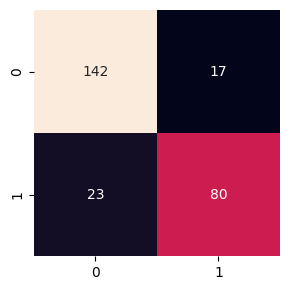

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

titanic_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(titanic_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La interpretación de una matriz de confusión es la siguiente:

- **Verdaderos positivos** (*TP, True positive*): Se corresponde con el número `142` y son los casos en los que el modelo predijo positivo (no supervivencia) y la clase real también es positiva.
- **Verdaderos negativos** (*TN, False negative*): Se corresponde con el número `80` y son los casos en los que el modelo predijo negativo (supervivencia) y la clase real también es negativa.
- **Falsos positivos** (*FP, False positive*): Se corresponde con el número `23` y son los casos en los que el modelo predijo positivo y la clase real es negativa.
- **Falsos negativos** (*FN, False negative*): Se corresponde con el número `17` y son los casos en los que el modelo predijo negativo y la clase real es positiva.

Estas cuatro medidas se utilizan a menudo para calcular métricas más complejas.

##### Paso 4: Optimización de resultados

Como hemos visto, el modelo base (con todos los parámetros predefinidos) de la regresión logística obtiene poco más de un 84% de precisión. Sin embargo, el hecho de modificar los parámetros del modelo podría suponer una mejora (o empeoramiento) significativos de los resultados. Existen varias estrategias como los modelos regularizados.